In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
pag = pd.read_sql("PRAGMA table_info(checker);",con)
pag

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,status,TEXT,0,None,0
2,2,success,INTEGER,0,None,0
3,3,timestamp,TIMESTAMP,0,None,0
4,4,numTrials,INTEGER,0,None,0
5,5,labname,TEXT,0,None,0
6,6,uid,TEXT,0,None,0


In [4]:
checker = pd.read_sql("SELECT * FROM checker WHERE uid LIKE 'user%'",con=con,parse_dates='timestamp')
checker

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [5]:

checker['hour'] = checker['timestamp'].dt.hour
checker['day_of_week'] = checker['timestamp'].dt.day_of_week
checker['day'] =checker['timestamp'].dt.day
checker['type_of_day'] = checker['day_of_week'].apply(lambda x: 'working-day' if x < 5 else 'weekend')
checker

,index,status,success,timestamp,numTrials,labname,uid,hour,day_of_week,day,type_of_day
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4,5,4,17,working-day
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4,5,4,17,working-day
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4,5,4,17,working-day
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4,5,4,17,working-day
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4,5,4,17,working-day
...,...,...,...,...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1,20,3,21,working-day
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1,20,3,21,working-day
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1,20,3,21,working-day
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1,20,3,21,working-day


In [6]:
checker = checker.drop(columns=checker.columns[0:3])
checker = checker.drop(columns=checker.columns[1:3])
checker

,timestamp,uid,hour,day_of_week,day,type_of_day
0,2020-04-17 05:19:02.744528,user_4,5,4,17,working-day
1,2020-04-17 05:22:35.249331,user_4,5,4,17,working-day
2,2020-04-17 05:22:45.549397,user_4,5,4,17,working-day
3,2020-04-17 05:34:14.691200,user_4,5,4,17,working-day
4,2020-04-17 05:34:24.422370,user_4,5,4,17,working-day
...,...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,user_1,20,3,21,working-day
3203,2020-05-21 20:22:41.785725,user_1,20,3,21,working-day
3204,2020-05-21 20:22:41.877806,user_1,20,3,21,working-day
3205,2020-05-21 20:37:00.129678,user_1,20,3,21,working-day


In [7]:
new_checker = checker.groupby(['type_of_day','day','hour']).count()
new_checker = new_checker.reset_index()
new_checker = new_checker[['type_of_day','day','hour','uid']]
new_checker

,type_of_day,day,hour,uid
0,weekend,2,7,3
1,weekend,2,8,1
2,weekend,2,9,2
3,weekend,2,10,1
4,weekend,2,11,84
...,...,...,...,...
277,working-day,30,10,8
278,working-day,30,11,1
279,working-day,30,15,4
280,working-day,30,18,11


In [8]:
df = new_checker.groupby(['type_of_day', 'hour']).mean('uid').rename(columns={'uid': 'commits'}).reset_index()
df = df.drop(columns=df.columns[2])
df

,type_of_day,hour,commits
0,weekend,0,2.000000
1,weekend,1,6.000000
2,weekend,3,1.000000
3,weekend,5,2.000000
4,weekend,7,4.000000
5,weekend,8,7.000000
6,weekend,9,3.666667
7,weekend,10,7.000000
8,weekend,11,23.600000
9,weekend,12,9.500000


In [9]:
weekend = df[df['type_of_day'] == 'weekend']
working_day_df = df[df['type_of_day'] == 'working-day']

In [10]:
weekend

,type_of_day,hour,commits
0,weekend,0,2.000000
1,weekend,1,6.000000
2,weekend,3,1.000000
3,weekend,5,2.000000
4,weekend,7,4.000000
5,weekend,8,7.000000
6,weekend,9,3.666667
7,weekend,10,7.000000
8,weekend,11,23.600000
9,weekend,12,9.500000


In [11]:
working_day_df

,type_of_day,hour,commits
21,working-day,0,3.000000
22,working-day,3,2.000000
23,working-day,5,7.500000
24,working-day,6,1.500000
25,working-day,7,5.166667
26,working-day,8,3.700000
27,working-day,9,6.000000
28,working-day,10,13.200000
29,working-day,11,6.769231
30,working-day,12,7.181818


In [12]:
grouped_df = df.groupby(['hour', 'type_of_day']).agg({'commits': 'sum'}).reset_index()


pivot_df = grouped_df.pivot(index='hour', columns='type_of_day', values='commits').reset_index()


pivot_df.columns.name = None
pivot_df.rename(columns={'weekend': 'weekend', 'working-day': 'working_day'}, inplace=True)


pivot_df.fillna(0, inplace=True)

In [13]:
pivot_df

,hour,weekend,working_day
0,0,2.000000,3.000000
1,1,6.000000,0.000000
2,3,1.000000,2.000000
3,5,2.000000,7.500000
4,6,0.000000,1.500000
5,7,4.000000,5.166667
6,8,7.000000,3.700000
7,9,3.666667,6.000000
8,10,7.000000,13.200000
9,11,23.600000,6.769231


array([<Axes: title={'center': 'weekend'}, xlabel='hour'>,
       <Axes: title={'center': 'working_day'}, xlabel='hour'>],
      dtype=object)

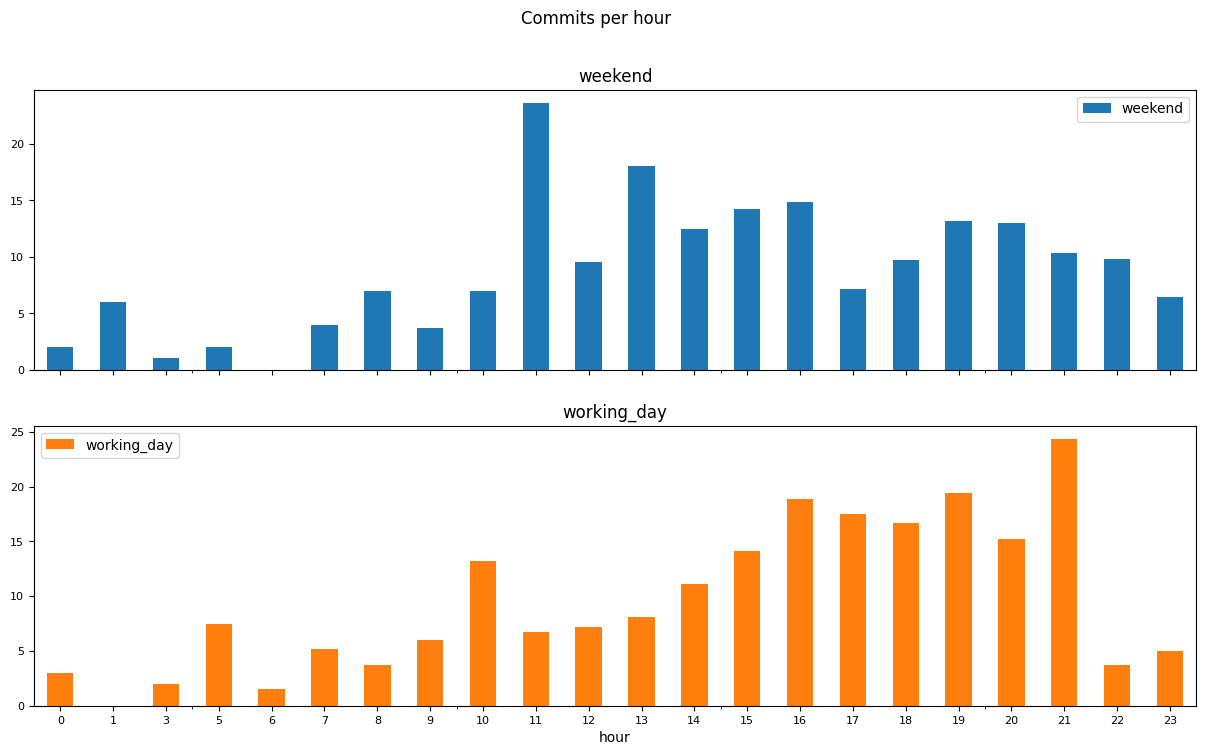

In [14]:
pivot_df.plot(kind='bar',x='hour',rot=0,subplots=True,figsize=(15,8),fontsize=8,title="Commits per hour")

Is the dynamic different on working days and weekends?”

In [15]:
pivot_df[pivot_df['weekend'] == pivot_df['weekend'].max()]

,hour,weekend,working_day
9,11,23.6,6.769231


In [16]:
pivot_df[pivot_df['working_day'] == pivot_df['working_day'].max()]

,hour,weekend,working_day
19,21,10.285714,24.333333


In [17]:
con.close()